### Relevant Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, plot_confusion_matrix
from datetime import datetime, timedelta

import pickle

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

### Importing Data

In [2]:
delivery_data= pd.read_csv("C:\\Users\\Aayushi\\Desktop\\Rider-Driven(Model)\\train.csv")

In [3]:
train_data=delivery_data.copy()
train_data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [4]:
test_data= pd.read_csv("C:\\Users\\Aayushi\\Desktop\\Rider-Driven(Model)\\test.csv")
test_data.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


In [5]:
my_submission = pd.DataFrame({'order_id': test_data.order_id})
my_submission.head()

,order_id
0,130231
1,130232
2,130233
3,130234
4,130235


### Data Exploration

In [6]:
train_data.columns.values

array(['order_time', 'order_id', 'order_date', 'allot_time',
       'accept_time', 'pickup_time', 'delivered_time', 'rider_id',
       'first_mile_distance', 'last_mile_distance', 'alloted_orders',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method',
       'reassignment_reason', 'reassigned_order', 'session_time',
       'cancelled_time'], dtype=object)

In [7]:
train_data.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [8]:
test_data.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
dtype: int64

In [9]:
train_data.dtypes

order_time               object
order_id                  int64
order_date               object
allot_time               object
accept_time              object
pickup_time              object
delivered_time           object
rider_id                  int64
first_mile_distance     float64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
undelivered_orders      float64
lifetime_order_count    float64
reassignment_method      object
reassignment_reason      object
reassigned_order        float64
session_time            float64
cancelled_time           object
dtype: object

In [10]:
train_data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


C:\Users\Aayushi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


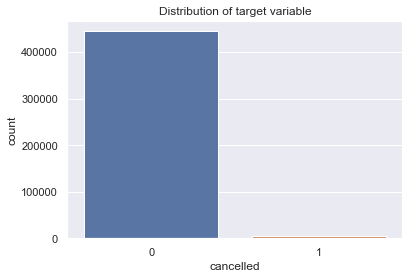

In [11]:
plt.title('Distribution of target variable')
sns.countplot(train_data['cancelled'])
plt.show()

In [12]:
# Studying the target variable
train_data['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

### Data Preprocessing

In [13]:
#Checking if order_time and order_date column contains same date
df_order=pd.Series(dtype=int)
df_order=np.where((pd.to_datetime(train_data['order_time'])).dt.date != pd.to_datetime(train_data['order_date']), 1, 0)
df_order.sum()

0

In [14]:
#spread of data
train_data['order_date'].unique()

array(['2021-01-26 00:00:00', '2021-01-27 00:00:00',
       '2021-01-28 00:00:00', '2021-01-29 00:00:00',
       '2021-01-30 00:00:00', '2021-01-31 00:00:00',
       '2021-02-01 00:00:00', '2021-02-02 00:00:00',
       '2021-02-03 00:00:00', '2021-02-04 00:00:00',
       '2021-02-05 00:00:00', '2021-02-06 00:00:00'], dtype=object)

In [15]:
# Dropping columns which will be of no use for our model
col_list = ['order_id','order_date','pickup_time','delivered_time','rider_id','cancelled_time','reassignment_method','reassignment_reason']

In [16]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1, errors='ignore')
test_data = test_data.drop(col_list, axis=1,errors='ignore')

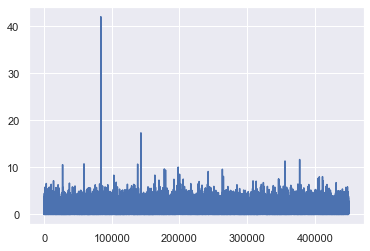

In [17]:
plt.plot(train_data['first_mile_distance'])

In [18]:
train_data.drop(train_data[train_data['first_mile_distance'] == (train_data['first_mile_distance'].max())].index, inplace = True)

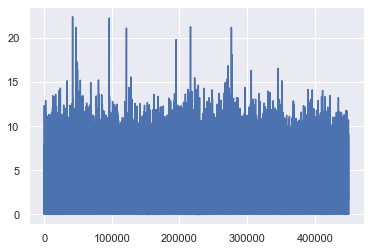

In [19]:
plt.plot(train_data['last_mile_distance'])

In [20]:
train_data['total_distance']=train_data['first_mile_distance']+ train_data['last_mile_distance']
test_data['total_distance']=test_data['first_mile_distance']+ test_data['last_mile_distance']

In [21]:
# Dropping columns which will be of no use for our model
col_list=['first_mile_distance','last_mile_distance']
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [22]:
# Function to fill missing values by mean
def fill_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(train_data[i].mean())

In [23]:
fill_mean_list = ['alloted_orders', 'delivered_orders','undelivered_orders']
fill_mean(fill_mean_list)

In [24]:
train_data['lifetime_order_count']= np.where(train_data['lifetime_order_count'].isna(),train_data['alloted_orders'],train_data['lifetime_order_count'])
test_data['lifetime_order_count']= np.where(test_data['lifetime_order_count'].isna(),test_data['alloted_orders'],test_data['lifetime_order_count'])

In [25]:
train_data['reassigned_order']=train_data['reassigned_order'].fillna(0)
test_data['reassigned_order']=test_data['reassigned_order'].fillna(0)

In [26]:
train_data['session_time']=train_data['session_time'].fillna(0)
test_data['session_time']=test_data['session_time'].fillna(0)

In [27]:
train_data.isna().sum()

order_time                0
allot_time                0
accept_time             157
alloted_orders            0
delivered_orders          0
cancelled                 0
undelivered_orders        0
lifetime_order_count      0
reassigned_order          0
session_time              0
total_distance            0
dtype: int64

In [28]:
train_data['%undelivered_orders']= train_data['undelivered_orders']/train_data['alloted_orders']
test_data['%undelivered_orders']= test_data['undelivered_orders']/test_data['alloted_orders']

In [29]:
train_data['odds_undeliver']= train_data['undelivered_orders']/train_data['delivered_orders']
test_data['odds_undeliver']= test_data['undelivered_orders']/test_data['delivered_orders']

In [30]:
train_data['allot_time']=  pd.to_datetime(train_data['allot_time'])- pd.to_datetime(train_data['order_time'])
allot_time = []
for i in train_data['allot_time']:
    allot_time.append(i.total_seconds())
    
train_data['allot_time']=allot_time

test_data['allot_time']=  pd.to_datetime(test_data['allot_time'])- pd.to_datetime(test_data['order_time'])
allot_time = []
for i in test_data['allot_time']:
    allot_time.append(i.total_seconds())
    
test_data['allot_time']=allot_time

In [31]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [32]:
date_list = ['order_time']
conv_date(date_list)

In [33]:
# Function to obtain year and month from datetime data
def get_hour(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.hour)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.hour)

In [34]:
get_hour('order_hour', 'order_time')

In [35]:
# Dropping columns which will be of no use for our model
col_list=['order_time','accept_time','delivered_orders','alloted_orders','undelivered_orders']
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

##### Categorising Order_time in 4 shifts
22-8= Night Shift <br />
8-12= Morning Shift <br />
12-17= Afternoon Shift <br />
17-22= Evening Shift <br />

In [36]:
train_order_time_shift=[]
for i in train_data['order_hour']:
    if((i<8) | (i>=22)):
        train_order_time_shift.append(0)
    elif((i>=8) & (i<12)):
        train_order_time_shift.append(2)
    elif((i>=12) & (i<17)):
        train_order_time_shift.append(3)
    else:
        train_order_time_shift.append(1)

test_order_time_shift=[]
for i in test_data['order_hour']:
    if((i<8) | (i>=22)):
        test_order_time_shift.append(0)
    elif((i>=8) & (i<12)):
        test_order_time_shift.append(2)
    elif((i>=12) & (i<17)):
        test_order_time_shift.append(3)
    else:
        test_order_time_shift.append(1)

In [37]:
train_data['order_hour']=train_order_time_shift
test_data['order_hour']=test_order_time_shift

In [38]:
train_data.head()

,allot_time,cancelled,lifetime_order_count,reassigned_order,session_time,total_distance,%undelivered_orders,odds_undeliver,order_hour
0,24.0,0,621.0,0.0,0.000000,4.2166,0.0,0.0,0
1,41.0,0,105.0,0.0,3.266667,5.2807,0.0,0.0,0
2,8.0,0,66.0,0.0,9.816667,7.0074,0.0,0.0,0
3,32.0,0,127.0,0.0,17.533333,8.5694,0.0,0.0,0
4,51.0,0,84.0,0.0,1.350000,6.7970,0.0,0.0,0


In [39]:
test_data.head()

,allot_time,lifetime_order_count,reassigned_order,session_time,total_distance,%undelivered_orders,odds_undeliver,order_hour
0,25.0,747.0,0.0,273.400000,6.1985,0.004630,0.004651,2
1,1.0,75.0,0.0,252.100000,7.9109,0.000000,0.000000,2
2,47.0,2214.0,0.0,241.383333,2.3784,0.000000,0.000000,2
3,1.0,1020.0,0.0,291.933333,4.4939,0.024000,0.024590,2
4,8.0,7284.0,0.0,247.133333,1.7675,0.005682,0.005714,2


In [40]:
train_data.nunique()

allot_time                3195
cancelled                    2
lifetime_order_count      2888
reassigned_order             2
session_time             65872
total_distance          187960
%undelivered_orders       1342
odds_undeliver            1335
order_hour                   4
dtype: int64

In [41]:
test_data.nunique()

allot_time               2445
lifetime_order_count     2651
reassigned_order            2
session_time            47015
total_distance          91784
%undelivered_orders      1037
odds_undeliver           1031
order_hour                  4
dtype: int64

### Train-Test Split

In [42]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
t_train, t_test = train_test_split(train_data, test_size = 0.25, stratify=train_data['cancelled'])

### Balancing

In [43]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data = t_train.sample(frac=1)

# Amount of fraud classes in proportion.
canc = train_data[train_data['cancelled'] == 1]
not_canc = train_data[train_data['cancelled'] == 0][:15000]


normal_distributed_df = pd.concat([canc,not_canc,canc,canc])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,allot_time,cancelled,lifetime_order_count,reassigned_order,session_time,total_distance,%undelivered_orders,odds_undeliver,order_hour
190762,2.0,0,62.0,0.0,72.666667,3.9465,0.000000,0.000000,3
84507,44.0,0,3770.0,0.0,287.250000,2.2739,0.018868,0.019231,2
384199,2.0,0,1398.0,0.0,534.033333,7.7549,0.000000,0.000000,3
320155,17.0,0,245.0,0.0,2.566667,4.3157,0.000000,0.000000,2
441123,4598.0,1,117.0,1.0,115.616667,4.3434,0.000000,0.000000,0


C:\Users\Aayushi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


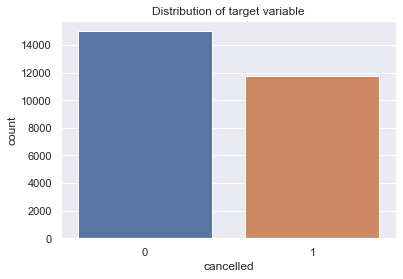

In [44]:
plt.title('Distribution of target variable')
sns.countplot(new_df['cancelled'])
plt.show()

t_train_c = t_train[t_train['cancelled']==1].sample(int(t_train[t_train['cancelled']==1].shape[0]*1),replace=False,random_state=42)
t_train_d = t_train[t_train['cancelled']==0].sample(int(t_train_c.shape[0])*1,random_state=42)
combined_df = pd.concat([t_train_c,t_train_d])

plt.title('Distribution of target variable')
sns.countplot(combined_df['cancelled'])
plt.show()

### X-Y Split

X_train= combined_df.drop(['cancelled'], axis=1).copy()
Y_train= combined_df['cancelled'].copy()

X_test= t_test.drop(['cancelled'], axis=1).copy()
Y_test= t_test['cancelled'].copy()

In [45]:
new_X_train= new_df.drop(['cancelled'], axis=1).copy()
new_Y_train= new_df['cancelled'].copy()

new_X_test= t_test.drop(['cancelled'], axis=1).copy()
new_Y_test= t_test['cancelled'].copy()

### Label Encoding

X_train_data_enc= pd.get_dummies(X_train, columns=['order_hour','reassigned_order'])
X_test_data_enc= pd.get_dummies(X_test, columns=['order_hour','reassigned_order'])
test_data=pd.get_dummies(test_data, columns=['order_hour','reassigned_order'])

In [46]:
X_train_data_enc= pd.get_dummies(new_X_train, columns=['order_hour','reassigned_order'])
X_test_data_enc= pd.get_dummies(new_X_test, columns=['order_hour','reassigned_order'])
test_data=pd.get_dummies(test_data, columns=['order_hour','reassigned_order'])

### Confusion Matrix Function

In [47]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

### Modelling 

In [48]:
X_train_ANN= X_train_data_enc.copy()
X_test_ANN= X_test_data_enc.copy()

Y_train_ANN= new_Y_train.copy()
Y_test_ANN= new_Y_test.copy()

In [49]:
X_train_ANN.head()

,allot_time,lifetime_order_count,session_time,total_distance,%undelivered_orders,odds_undeliver,order_hour_0,order_hour_1,order_hour_2,order_hour_3,reassigned_order_0.0,reassigned_order_1.0
190762,2.0,62.0,72.666667,3.9465,0.000000,0.000000,0,0,0,1,1,0
84507,44.0,3770.0,287.250000,2.2739,0.018868,0.019231,0,0,1,0,1,0
384199,2.0,1398.0,534.033333,7.7549,0.000000,0.000000,0,0,0,1,1,0
320155,17.0,245.0,2.566667,4.3157,0.000000,0.000000,0,0,1,0,1,0
441123,4598.0,117.0,115.616667,4.3434,0.000000,0.000000,1,0,0,0,0,1


In [50]:
# Importing the Keras libraries and packages
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [51]:
classifier = Sequential()

#add input layer and first hidden layer
classifier.add(Dense(5, kernel_initializer='random_uniform', activation = 'relu', input_dim = 12))

In [52]:
#add 2nd hidden layer
classifier.add(Dense(5, bias_initializer='random_uniform', activation = 'relu'))

In [53]:
#add 3rd hidden layer
classifier.add(Dense(5, bias_initializer='random_uniform', activation = 'relu'))

In [54]:
classifier.add(Dense(1, bias_initializer='random_uniform', activation = 'sigmoid'))

In [55]:
optimizer = keras.optimizers.Adam(lr=0.0001)
classifier.compile(optimizer = optimizer, loss ='binary_crossentropy', metrics = ['accuracy'])

C:\Users\Aayushi\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
nn_history= classifier.fit(X_train_ANN, Y_train_ANN, batch_size = 32, epochs =100,validation_data = (X_test_ANN, Y_test_ANN))

Epoch 1/100
836/836 [==============================] - 2s 2ms/step - loss: 0.8437 - accuracy: 0.4567 - val_loss: 0.6567 - val_accuracy: 0.7311
Epoch 2/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6665 - accuracy: 0.5960 - val_loss: 0.6265 - val_accuracy: 0.8709
Epoch 3/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6538 - accuracy: 0.6100 - val_loss: 0.5666 - val_accuracy: 0.9135
Epoch 4/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6411 - accuracy: 0.6177 - val_loss: 0.4978 - val_accuracy: 0.9417
Epoch 5/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6355 - accuracy: 0.6210 - val_loss: 0.5258 - val_accuracy: 0.9419
Epoch 6/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6344 - accuracy: 0.6222 - val_loss: 0.5457 - val_accuracy: 0.9342
Epoch 7/100
836/836 [==============================] - 2s 2ms/step - loss: 0.6332 - accuracy: 0.6258 - val_loss: 0.5012 - val_accuracy: 0.9483

Epoch 58/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5900 - accuracy: 0.6853 - val_loss: 0.5171 - val_accuracy: 0.8941
Epoch 59/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5895 - accuracy: 0.6865 - val_loss: 0.4922 - val_accuracy: 0.8916
Epoch 60/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5910 - accuracy: 0.6850 - val_loss: 0.4969 - val_accuracy: 0.9060
Epoch 61/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5887 - accuracy: 0.6860 - val_loss: 0.5096 - val_accuracy: 0.8833
Epoch 62/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5894 - accuracy: 0.6859 - val_loss: 0.4752 - val_accuracy: 0.9074
Epoch 63/100
836/836 [==============================] - 2s 2ms/step - loss: 0.5885 - accuracy: 0.6866 - val_loss: 0.4757 - val_accuracy: 0.9066
Epoch 64/100
836/836 [==============================] - 3s 3ms/step - loss: 0.5888 - accuracy: 0.6867 - val_loss: 0.5124 - val_accuracy:

In [57]:
y_pred_prob_ANN = classifier.predict(X_test_ANN)
y_pred_ANN=np.where(y_pred_prob_ANN>0.5,1,0)

C:\Users\Aayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


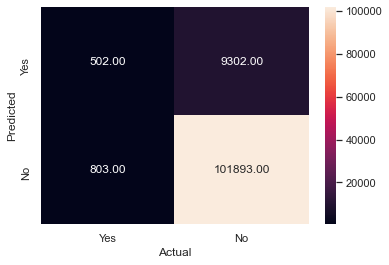

In [58]:
draw_cm(Y_test_ANN, y_pred_ANN)

In [59]:
# Predicting on the test dataset
test_data = np.asarray(test_data).astype(np.float32)
my_pred_prob_ANN = classifier.predict(test_data)

my_pred_ANN=np.where(my_pred_prob_ANN>0.5,1,0)

### XGBoost

In [60]:
X_train_XG= X_train_data_enc.copy()
X_test_XG= X_test_data_enc.copy()

Y_train_XG= new_Y_train.copy()
Y_test_XG= new_Y_test.copy()

In [61]:
Y_train_XG

190762    0
84507     0
384199    0
320155    0
441123    1
         ..
343074    1
447577    0
45685     1
154226    0
368926    1
Name: cancelled, Length: 26739, dtype: int64

In [62]:
from sklearn import metrics
import lightgbm as lgb
from xgboost import plot_importance

# Create a XGB Classifier
gbm = xgb.XGBClassifier(objective='binary:logistic', base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.6,
                        enable_categorical=False, gamma=0.1, gpu_id=-1, interaction_constraints='',
                        learning_rate=0.01, max_delta_step=0, max_depth=7,min_child_weight=1, monotone_constraints='()',
                        n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
                          subsample=0.6, tree_method='exact', validate_parameters=1,verbosity=None)
gbm.fit(X_train_XG, Y_train_XG, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_test_XG, Y_test_XG)])

[0]	validation_0-auc:0.66756
[1]	validation_0-auc:0.68947
[2]	validation_0-auc:0.69561
[3]	validation_0-auc:0.70782
[4]	validation_0-auc:0.71316
[5]	validation_0-auc:0.71455
[6]	validation_0-auc:0.71454
[7]	validation_0-auc:0.71626


C:\Users\Aayushi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-auc:0.71595
[9]	validation_0-auc:0.71676
[10]	validation_0-auc:0.71685
[11]	validation_0-auc:0.71665
[12]	validation_0-auc:0.71715
[13]	validation_0-auc:0.71854
[14]	validation_0-auc:0.71924
[15]	validation_0-auc:0.72001
[16]	validation_0-auc:0.72119
[17]	validation_0-auc:0.72188
[18]	validation_0-auc:0.72220
[19]	validation_0-auc:0.72197
[20]	validation_0-auc:0.72249
[21]	validation_0-auc:0.72295
[22]	validation_0-auc:0.72338
[23]	validation_0-auc:0.72329
[24]	validation_0-auc:0.72301
[25]	validation_0-auc:0.72274
[26]	validation_0-auc:0.72267
[27]	validation_0-auc:0.72298
[28]	validation_0-auc:0.72305
[29]	validation_0-auc:0.72335
[30]	validation_0-auc:0.72381
[31]	validation_0-auc:0.72442
[32]	validation_0-auc:0.72479
[33]	validation_0-auc:0.72425
[34]	validation_0-auc:0.72421
[35]	validation_0-auc:0.72507
[36]	validation_0-auc:0.72508
[37]	validation_0-auc:0.72530
[38]	validation_0-auc:0.72523
[39]	validation_0-auc:0.72462
[40]	validation_0-auc:0.72462
[41]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [63]:
y_pred_XG = gbm.predict(X_test_XG)

In [64]:
print('Test Accuracy: ',gbm.score(X_test_XG,Y_test_XG))
print('Train Accuracy: ',gbm.score(X_train_XG,Y_train_XG))
print('AUC Score:',roc_auc_score(new_Y_test,y_pred_XG))

Test Accuracy:  0.9161333333333334
Train Accuracy:  0.7097124051011631
AUC Score: 0.6652604697246682


C:\Users\Aayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


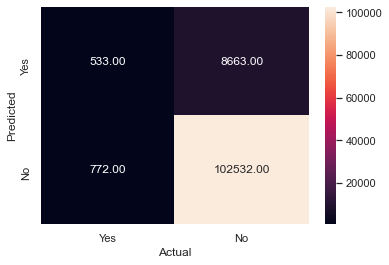

In [65]:
# Confusion matrix 
draw_cm(Y_test_XG, y_pred_XG)

In [66]:
# Predicting on the test dataset
my_pred_XG = gbm.predict(test_data)

### Light GBM

In [67]:
X_train_light= X_train_data_enc.copy()
X_test_light= X_test_data_enc.copy()

Y_train_light= new_Y_train.copy()
Y_test_light= new_Y_test.copy()

In [68]:
from sklearn import metrics
import lightgbm as lgb 
# Create a XGB Classifier
model = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', learning_rate=0.10,reg_lambda=0, max_depth=7,random_state=42,subsample=0.9, colsample_bytree=0.6, gamma=2)
model.fit(X_train_light,Y_train_light,eval_metric='auc')

[LightGBM] [Warning] Unknown parameter: gamma


LGBMClassifier(colsample_bytree=0.6, gamma=2, max_depth=7, objective='binary',
               random_state=42, reg_lambda=0, subsample=0.9)

In [69]:
y_pred_light = model.predict(X_test_light)

In [70]:
print('Test Accuracy: ',model.score(X_test_light,Y_test_light))
print('Train Accuracy: ',model.score(X_train_light,Y_train_light))
print('AUC Score:',roc_auc_score(new_Y_test,y_pred_light))

Test Accuracy:  0.9029955555555556
Train Accuracy:  0.7528703392049066
AUC Score: 0.6718670679499048


C:\Users\Aayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


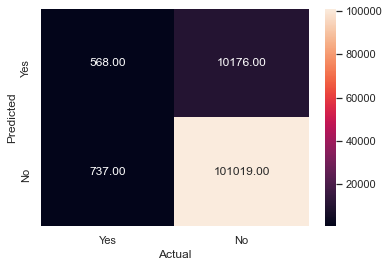

In [71]:
# Confusion matrix 
draw_cm(Y_test_light, y_pred_light)

### Random Forest

In [72]:
X_train_RF= X_train_data_enc.copy()
X_test_RF= X_test_data_enc.copy()

Y_train_RF= new_Y_train.copy()
Y_test_RF= new_Y_test.copy()

In [73]:
# Random Forest Classifier

#Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()
rf=RandomForestClassifier(n_estimators=25, criterion='entropy',max_features= 'auto', max_depth=3, min_samples_split= 2, min_samples_leaf=5, random_state=0)
# Run the grid search
rf.fit(X_train_RF,Y_train_RF)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       n_estimators=25, random_state=0)

In [74]:
y_pred_RF = model.predict(X_test_RF)

C:\Users\Aayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


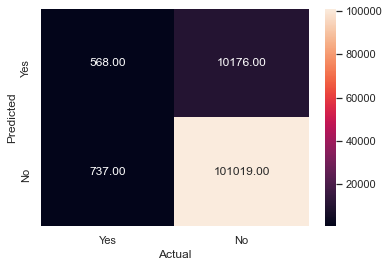

In [75]:
# Confusion matrix 
draw_cm(Y_test_RF, y_pred_RF)

In [76]:
# Predicting on the test dataset
my_pred_RF = model.predict(test_data)

### Stacking

In [77]:
from mlxtend.classifier import StackingCVClassifier
stack= StackingCVClassifier(classifiers=(rf,gbm,model),
                                meta_classifier=gbm,
                                use_features_in_secondary=True)

In [78]:
stack_= stack.fit(np.array(X_train_data_enc), np.array(new_Y_train))

C:\Users\Aayushi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aayushi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma


C:\Users\Aayushi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Unknown parameter: gamma
[17:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aayushi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [79]:
y_pred=stack.predict(X_test_data_enc)

C:\Users\Aayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


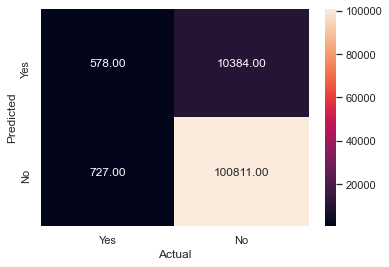

In [80]:
draw_cm(new_Y_test,y_pred)

In [81]:
#prediction
my_pred=stack.predict(test_data)

In [82]:
my_submission['cancelled'] = my_pred

In [83]:
my_submission

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [84]:
# Saving predictions to file
my_submission.to_csv('Stacked_Model_Prediction1.csv', index=False)
print('Saved file to disk.')

Saved file to disk.
